# Discovering interpretable features

Learn about a dimension reduction technique called "Non-negative matrix factorization" ("NMF") that expresses samples as combinations of interpretable parts.<br>
For example, it expresses documents as combinations of topics, and images in terms of commonly occurring visual patterns.<br> You'll also learn to use NMF to build recommender systems that can find you similar articles to read, or musical artists that match your listening history!

In [26]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, coo_matrix
from sklearn.decomposition import NMF, PCA
from sklearn.preprocessing import normalize, Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

### Non-negative matrix factorization (NMF)
- Dimension reduction technique
- NMF models are interpretable (unlike PCA)
- Easy to interpret means easy to explain!
- However, all sample features must be **non-negative (>= 0)**
- NMF expresses documents as combinations of topics (or "themes"), images as combinations of patterns

### Using scikit-learn NMF
- Follows fit() / transform() pa!ern
- Must specify number of components e.g. NMF(n_components=2)
- Works with NumPy arrays and with _csr_matrix_ (sparse matrix,it stores the explicit indices and values at those indices)

### NMF applied to Wikipedia articles
Apply NMF, this time using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix articles. Here, fit the model and transform the articles. In the next exercise, you'll explore the result.

In [8]:
df = pd.read_csv('./datasets/wikipedia_articles/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [5]:
# Create an NMF instance: model
model = NMF(n_components= 6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.40470856e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.66611762e-01]
 [3.82034706e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.98651634e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.81744653e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.85522757e-01]
 [1.29283854e-02 1.37891981e-02 7.76329330e-03 3.34441787e-02
  0.00000000e+00 3.34526188e-01]
 [0.00000000e+00 0.00000000e+00 2.06743337e-02 0.00000000e+00
  6.04522009e-03 3.59065620e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.90982419e-01]
 [1.54265742e-02 1.42819492e-02 3.76635556e-03 2.37080419e-02
  2.62635572e-02 4.80780555e-01]
 [1.11732660e-02 3.13682810e-02 3.09487749e-02 6.56912711e-02
  1.96688934e-02 3.38293090e-01]
 [0.00000000e+00 0.00000000e+00 5.30722972e-01 0.0

### NMF features of the Wikipedia articles
Now you will explore the NMF features you created in the previous exercise. 
When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. 

In [6]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])


0    0.003845
1    0.000000
2    0.000000
3    0.575635
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422325
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


### NMF learns topics of documents
You learned when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Verify this for yourself for the NMF model that you built earlier using the Wikipedia articles.
Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington.Identify the topic of the corresponding NMF component

In [7]:
words = []
with open('./datasets/wikipedia_articles/wikipedia-vocabulary-utf8.txt') as f:
    words = f.read().splitlines()

In [9]:
# Create a DataFrame: components_df
components_df =pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3, :]

# Print result of nlargest
print(component.nlargest())


(6, 13125)
film       0.627959
award      0.253165
starred    0.245316
role       0.211479
actress    0.186422
Name: 3, dtype: float64


### Explore the LED digits dataset
Use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array samples, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

In [16]:
#load dataset
df = pd.read_csv('./datasets/lcd-digits.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
samples = df.values

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


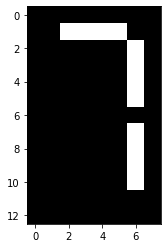

In [19]:
# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')

### NMF learns the parts of images
Now use what you've learned about NMF to decompose the digits dataset. You are again given the digit images as a 2D array samples. This time, you are also provided with a function show_as_image() that displays the image encoded by any 1D array:

```def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()```
<br>After you are done, take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

In [20]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

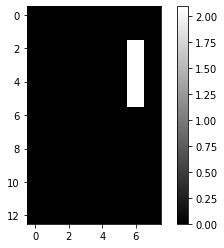

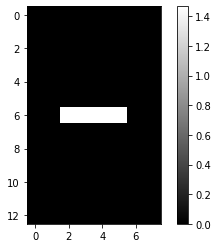

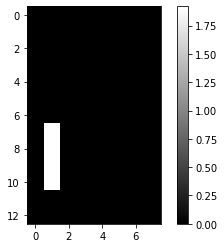

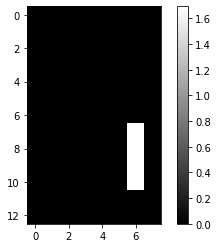

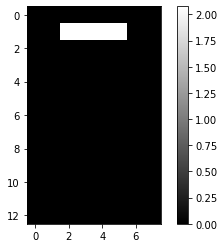

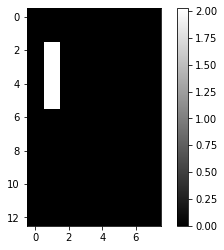

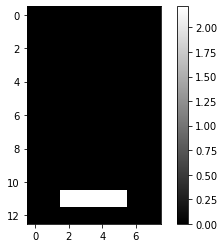

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37557191e-16]


In [21]:
# Create an NMF model: model
model = NMF(n_components = 7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

### PCA doesn't learn parts
Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array samples. 
After submitting the answer, notice that the components of PCA do not represent meaningful parts of images of LED digits!

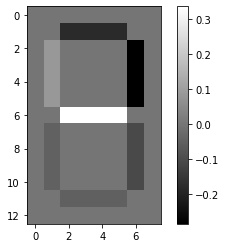

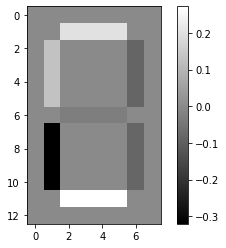

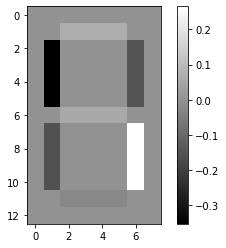

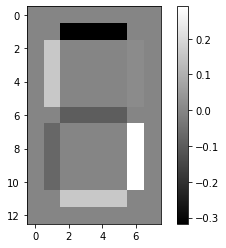

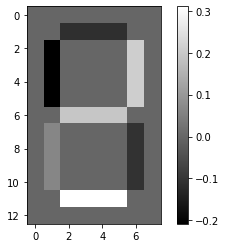

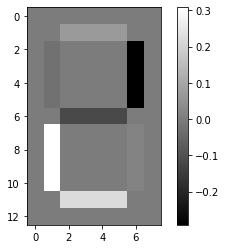

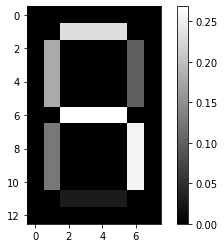

In [22]:
# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

### Which articles are similar to 'Cristiano Ronaldo'?
You learned how to use NMF features and the cosine similarity to find similar articles. Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo. The NMF features you obtained earlier are available as nmf_features, while titles is a list of the article titles.

In [23]:
# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


### Recommend musical artists part I
In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array ```artists``` whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, ```MaxAbsScaler```, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. 

In [27]:
df = pd.read_csv('./datasets/musical_artists/scrobbler-small-sample.csv')
artists1 = df.sort_values(['artist_offset', 'user_offset'], ascending=[True, True])
row_ind = np.array(artists1['artist_offset'])
col_ind = np.array(artists1['user_offset'])
data1 = np.array(artists1['playcount'])
artists = coo_matrix((data1, (row_ind, col_ind)))

In [28]:
# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

### Recommend musical artists part II
Suppose you were a big fan of Bruce Springsteen - which other musicial artists might you like? Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists.

In [29]:
#load dataset
df = pd.read_csv('./datasets/musical_artists/artists.csv', header=None)
artist_names = df.values.reshape(111).tolist()

In [30]:
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

Bruce Springsteen    1.000000
Neil Young           0.956920
Van Morrison         0.874520
Leonard Cohen        0.866425
Bob Dylan            0.861276
dtype: float64
